<a href="https://colab.research.google.com/github/ricardoruiz19/TalentoTech/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalación de librerías python necesarias
!pip install requests
!pip install beautifulsoup4
!pip install pandas

In [2]:
#Importar librerías para extracción de datos web
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
response = requests.get('https://scrapepark.org/')
print(response.status_code)
#print(response.text)

200


In [4]:
#Sitio web de la extracción de datos
url         = "https://scrapepark.org/"
response    = requests.get(url)
soup        = BeautifulSoup(response.content, 'html.parser')

In [5]:
#ejemplo de lectura y extracción de un html con la librería BeautifulSoup
html_doc    = "<html><head><title>Example</title></head><body><p>Bienvenidos</p></body></html>"
soup        = BeautifulSoup(html_doc, 'html.parser')
print(soup.body.string)

Bienvenidos


In [6]:
#Sitio web de la extracción de datos
url = "http://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [7]:
#recorriendo los datos y almacenandolos en una lista
books = soup.find_all('article', class_='product_pod')#accede a la etiqueta article y la clase product_pod
book_list = [] #crea una lista vacia

for book in books: #creando estructura repetitiva for
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    book_list.append({"Title": title, "Price": price})


In [23]:
df_books = pd.DataFrame(book_list)
print(df_books.head())


                                   Title   Price
0                   A Light in the Attic  £51.77
1                     Tipping the Velvet  £53.74
2                             Soumission  £50.10
3                          Sharp Objects  £47.82
4  Sapiens: A Brief History of Humankind  £54.23


In [14]:
# convierte todos los valores de la columna Price a dolares
# Elimina el símbolo de la moneda y convierte a float

#df_books['Price'] = df_books['Price'].str.replace('£', '').astype(float)

# Convierte a dólares
#df_books['Price (USD)'] = df_books['Price'] * exchange_rate

In [15]:
df_books.head()

,Title,Price
0,A Light in the Attic,£51.77
1,Tipping the Velvet,£53.74
2,Soumission,£50.10
3,Sharp Objects,£47.82
4,Sapiens: A Brief History of Humankind,£54.23


In [20]:
df_books_sel = df_books[['Title', 'Price']]
print(df_books_sel.head())

                                   Title   Price
0                   A Light in the Attic  £51.77
1                     Tipping the Velvet  £53.74
2                             Soumission  £50.10
3                          Sharp Objects  £47.82
4  Sapiens: A Brief History of Humankind  £54.23


In [18]:
#convertir el valor en £ a dolares
# Cantidad en libras
amount_gbp = 51.77

# Tasa de cambio (1 GBP = 1.27 USD)
exchange_rate = 1.27

# Conversión a dólares
amount_usd = amount_gbp * exchange_rate

# Resultado
print(f"£{amount_gbp} es igual a ${amount_usd:.2f} USD")


£51.77 es igual a $65.75 USD


In [ ]:
df_books_sel.to_csv('books.csv', index=False)


In [21]:
# AGREGADO

def convert_price(price_gbp, conversion_rate=5350):
    price_numeric = float(price_gbp.replace('£', ''))
    price_cop = price_numeric * conversion_rate
    return f'COP {price_cop:,.2f}'

df_books['Price (COP)'] = df_books['Price'].apply(convert_price)

# Print the updated DataFrame
print(df_books.head())

                                   Title   Price     Price (COP)
0                   A Light in the Attic  £51.77  COP 276,969.50
1                     Tipping the Velvet  £53.74  COP 287,509.00
2                             Soumission  £50.10  COP 268,035.00
3                          Sharp Objects  £47.82  COP 255,837.00
4  Sapiens: A Brief History of Humankind  £54.23  COP 290,130.50


In [24]:
# AGREGADO

def extract_star_rating(product):
    star_rating_tag = product.find('p', class_='star-rating')
    if star_rating_tag:
        for class_name in star_rating_tag['class']:
            if class_name != 'star-rating':
                return class_name
    return None

book_list = [] #crea una lista vacia

for book in books: #creando estructura repetitiva for
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    star_rating = extract_star_rating(book)
    book_list.append({
        'title': title,
        'star_rating': star_rating,
        'price': price
    })


df_books = pd.DataFrame(book_list)
print(df_books.head())

                                   title star_rating   price
0                   A Light in the Attic       Three  £51.77
1                     Tipping the Velvet         One  £53.74
2                             Soumission         One  £50.10
3                          Sharp Objects        Four  £47.82
4  Sapiens: A Brief History of Humankind        Five  £54.23


In [25]:
# AGREGADO

star_rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

# Add a numeric star rating column
df_books['star_rating_numeric'] = df_books['star_rating'].map(star_rating_map)
print(df_books.head())

                                   title star_rating   price  \
0                   A Light in the Attic       Three  £51.77   
1                     Tipping the Velvet         One  £53.74   
2                             Soumission         One  £50.10   
3                          Sharp Objects        Four  £47.82   
4  Sapiens: A Brief History of Humankind        Five  £54.23   

   star_rating_numeric  
0                    3  
1                    1  
2                    1  
3                    4  
4                    5  


In [27]:
# AGREGADO

df_books_sorted = df_books.sort_values(by='star_rating_numeric', ascending=False)
print(df_books_sorted.head())

                                                title star_rating   price  \
12                                        Set Me Free        Five  £17.46   
4               Sapiens: A Brief History of Humankind        Five  £54.23   
14                          Rip it Up and Start Again        Five  £35.02   
13  Scott Pilgrim's Precious Little Life (Scott Pi...        Five  £52.29   
3                                       Sharp Objects        Four  £47.82   

    star_rating_numeric  
12                    5  
4                     5  
14                    5  
13                    5  
3                     4  


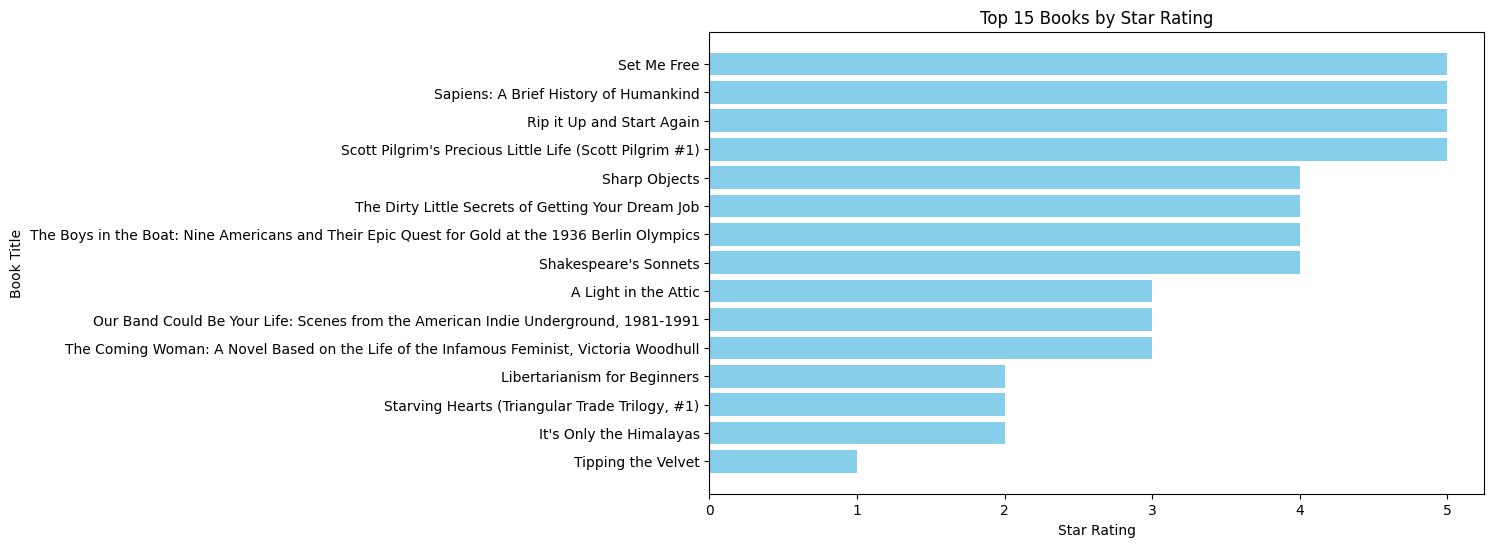

In [35]:
# AGREGADO

import matplotlib.pyplot as plt

df_top15 = df_books_sorted.head(15)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_top15['title'], df_top15['star_rating_numeric'], color='skyblue')
plt.xlabel('Star Rating')
plt.ylabel('Book Title')
plt.title('Top 15 Books by Star Rating')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.show()
